In [1]:
# Victor Z
# UW-Madison, 2024
# simulating the central limit theorem (clt)

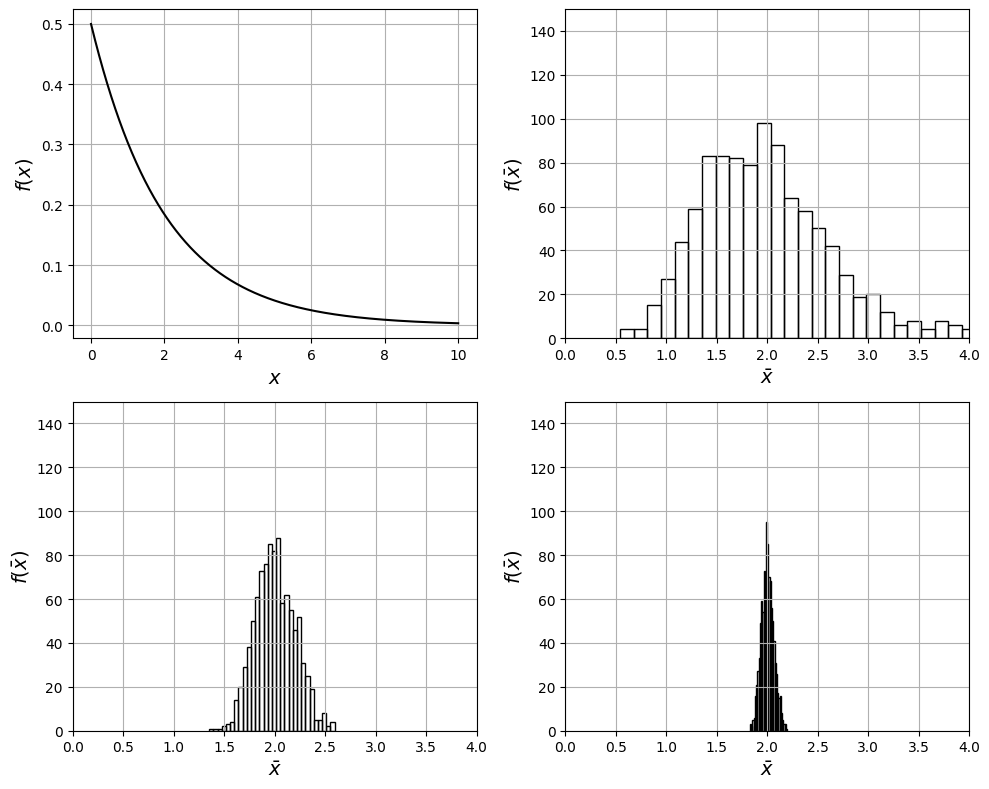

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, norm

# note there are discrepancies with Matlab due to use of different samples
np.random.seed(0)
N = 1000  # number of samples

plt.figure(figsize=(10, 8))

# Plot the PDF of the Weibull distribution
plt.subplot(2, 2, 1)
xgrid = np.linspace(0, 10, 1000)
plt.plot(xgrid, weibull_min.pdf(xgrid, 1, scale=2), 'black', linewidth=1.5)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$f(x)$', fontsize=14)
plt.grid(True)

# Simulate and plot the distribution of sample means for S=10
S = 10
m = [np.mean(weibull_min.rvs(1, scale=2, size=S)) for _ in range(N)]

plt.subplot(2, 2, 2)
plt.hist(m, bins=30, density=False, edgecolor='black', facecolor='none', linewidth=1)
plt.xlabel(r'$\bar{x}$', fontsize=14)
plt.ylabel(r'$f(\bar{x})$', fontsize=14)
plt.grid(True)
plt.axis([0, 4, 0, 150])

# Simulate and plot the distribution of sample means for S=100
S = 100
m = [np.mean(weibull_min.rvs(1, scale=2, size=S)) for _ in range(N)]

plt.subplot(2, 2, 3)
plt.hist(m, bins=30, density=False, edgecolor='black', facecolor='none', linewidth=1)
plt.xlabel(r'$\bar{x}$', fontsize=14)
plt.ylabel(r'$f(\bar{x})$', fontsize=14)
plt.grid(True)
plt.axis([0, 4, 0, 150])

# Simulate and plot the distribution of sample means for S=1000
S = 1000
m = [np.mean(weibull_min.rvs(1, scale=2, size=S)) for _ in range(N)]
m = np.array(m)

# Estimate variance of sample estimate using batching
mb = np.mean(m)
vestS = (1 / N) * np.sum((m - mb) ** 2)
vest = vestS * S

# Real mean and variance of RV
mm, vv = weibull_min.stats(1, scale=2, moments='mv')

# Obtain mean and variance from Gaussian fit
mu, sigma = norm.fit(m)
v2s = sigma ** 2
v2 = v2s * S

plt.subplot(2, 2, 4)
plt.hist(m, bins=30, density=False, edgecolor='black', facecolor='none', linewidth=1)
plt.xlabel(r'$\bar{x}$', fontsize=14)
plt.ylabel(r'$f(\bar{x})$', fontsize=14)
plt.grid(True)
plt.axis([0, 4, 0, 150])

plt.tight_layout()
plt.show()


In [4]:
print(f'Estimated variance of sample estimate: {vest}')
print(f'Real mean: {mm}, Real variance: {vv}')
print(f'Mean from Gaussian fit: {mu}, Variance from Gaussian fit: {v2}')


Estimated variance of sample estimate: 3.9290736778325104
Real mean: 2.0, Real variance: 4.0
Mean from Gaussian fit: 2.0027333955167, Variance from Gaussian fit: 3.9290736778325095
